Trabalho III de Tópicos I


Nome: Vinícius Barbosa da Silva


Matrícula: 20181SI0007


Prof: Josenildo Costa da Silva

## Dataset:

---



**O Video Game Dataset contém 20.580 entradas, com cada entrada representando um videogame.**


https://www.kaggle.com/datasets/shivamvadalia27/video-games


O conjunto de dados inclui 8 colunas:

---



id: Identificador único para cada videogame (tipo de dados: int64).

**name**: O título ou nome do videogame (tipo de dados: objeto).

**released**: a data de lançamento do videogame (tipo de dados: objeto).

**added**: O número de vezes que o jogo foi adicionado ou adicionado aos favoritos (tipo de dados: int64).

**playtime**: O tempo médio de reprodução em minutos (tipo de dados: int64).

**reviews_count**: O número de reviews do videogame (tipo de dados: int64).

**ratings_count**: O número total de avaliações recebidas pelo jogo (tipo de dados: int64).

**rating**: a pontuação média de classificação para o videogame (tipo de dados: float64).


---



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import scipy.stats as st

In [ ]:
df = pd.read_csv('/content/games.csv')

In [ ]:
df.sample(10)

,id,name,released,added,playtime,reviews_count,ratings_count,rating
13699,20444,1931: Scheherazade at the Library of Pergamum,2015-03-26,101,6,2,2,0.00
16737,20658,Bard to the Future,2015-02-27,73,1,2,2,0.00
3194,44741,"Warhammer 40,000: Inquisitor - Martyr",2018-06-06,930,5,103,101,3.35
10925,17125,Karma Miwa,2016-08-12,146,4,3,3,0.00
9791,23873,Super Paper Mario,2007-04-09,175,21,82,82,4.07
746,9830,Brawlhalla,2014-04-30,6694,2,1004,997,3.22
15891,63464,Legend Knight,2018-04-18,80,39,1,1,0.00
20541,22005,Rocking Pilot,2017-05-15,45,5,3,3,0.00
1642,12280,Tomb Raider IV: The Last Revelation,1999-10-31,2104,1,157,156,3.71
13102,23286,Mystic Journey: Tri Peaks Solitaire,2017-01-18,108,1,0,0,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20580 entries, 0 to 20579
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20580 non-null  int64  
 1   name           20580 non-null  object 
 2   released       19894 non-null  object 
 3   added          20580 non-null  int64  
 4   playtime       20580 non-null  int64  
 5   reviews_count  20580 non-null  int64  
 6   ratings_count  20580 non-null  int64  
 7   rating         20580 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,id,added,playtime,reviews_count,ratings_count,rating
count,20580.000000,20580.000000,20580.000000,20580.000000,20580.000000,20580.000000
mean,99829.712974,681.082313,3.394704,106.611370,105.464431,2.209226
std,181760.561898,1509.210518,11.109085,338.262309,334.656611,1.673076
min,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000
25%,13411.750000,84.000000,1.000000,4.000000,4.000000,0.000000
50%,21393.500000,161.000000,2.000000,13.000000,13.000000,2.820000
75%,54124.000000,496.000000,4.000000,49.000000,48.000000,3.670000
max,960912.000000,19385.000000,900.000000,6421.000000,6332.000000,4.800000


## Detecção de Valores ausentes

---



In [ ]:
df.isnull().sum()

id                 0
name               0
released         686
added              0
playtime           0
reviews_count      0
ratings_count      0
rating             0
dtype: int64

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()                                 #Total missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)         # Percentage of missing values
    mis_val_df = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_df.rename(columns = {0 : 'Ausentes',
                                 1 : 'Percentual'},
                      inplace=True)
    mis_val_df = mis_val_df[mis_val_df.iloc[:,1] != 0]
    mis_val_df = mis_val_df.sort_values('Percentual',
                           ascending=False).round(1)
    return mis_val_df

In [ ]:
missing_values_table(df)

,Ausentes,Percentual
released,686,3.3


<Axes: >

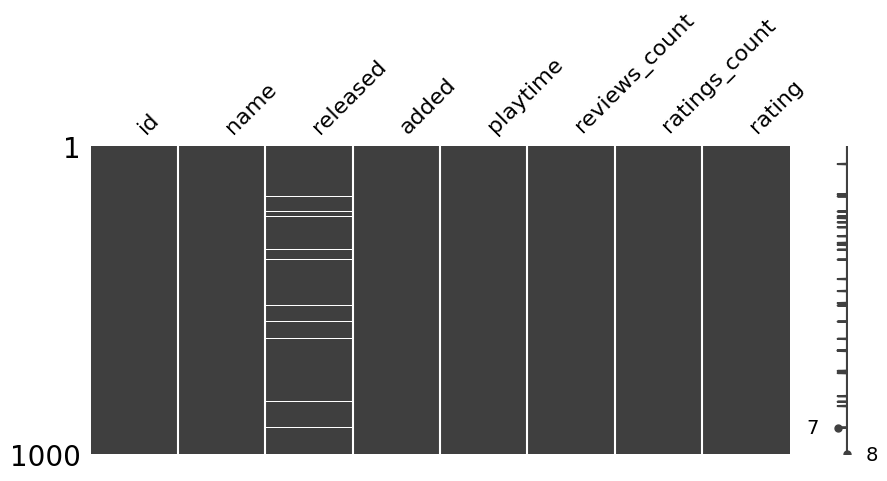

In [ ]:
msno.matrix(df.sample(1000),figsize=(10,4))

Imputação

In [ ]:
df2 = df.copy()
df2.fillna('No Date Info',inplace=True)
df2[['released']]

,released
0,2013-09-17
1,2015-05-18
2,2011-04-18
3,2013-03-05
4,2012-08-21
...,...
20575,2017-02-02
20576,2017-04-14
20577,2015-01-30
20578,2016-09-15


In [ ]:
df2.isnull().sum()

id               0
name             0
released         0
added            0
playtime         0
reviews_count    0
ratings_count    0
rating           0
dtype: int64

## Tratamento de Anômalos

In [ ]:
df.mean(numeric_only=True)

id               99829.712974
added              681.082313
playtime             3.394704
reviews_count      106.611370
ratings_count      105.464431
rating               2.209226
dtype: float64

### Funções

-Regra empírica 3*std

In [ ]:
def drop_outliers_std_v2(df, field_name, k=3):
    mean, std = df[field_name].mean(), df[field_name].std()
    lower, upper = mean - k*std, mean + k*std
    return df.query(f'{lower} <= {field_name} <= {upper}').copy()

In [ ]:
def drop_outliers_3std(df, field_name):
  df2 = df.copy()
  m = df2[field_name].mean()
  sd = df2[field_name].std()
  upper = m + 3*sd
  lower = m - 3*sd
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

Tratamento com IQR

In [ ]:
def drop_outliers_iqr(df, field_name):
  df2 = df.copy()
  q1 = df2[field_name].quantile(.25)
  q3 = df2[field_name].quantile(.75)
  iqr = q3- q1
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

Tratamento Z-score

In [ ]:
def drop_outliers_z(df,col,k=3):
  z_values = np.abs(stats.zscore(df[col]))
  return df[z_values < k]

boxplots

In [ ]:
def boxplots_pos_out(df,df2,col):
  fig, axes = plt.subplots(ncols=2, figsize=(5,5))
  sns.boxplot(data=df,y=col,palette="muted",ax=axes[0])
  sns.boxplot(data=df2,y=col,palette="muted",ax=axes[1])
  plt.tight_layout()
  plt.show()

### Coluna - added

In [ ]:
added_df1 = drop_outliers_3std(df2,'added')
added_df1v2 = drop_outliers_std_v2(df2,'added')

In [ ]:
added_df2 = drop_outliers_iqr(df2,'added')

In [ ]:
added_df4 = drop_outliers_z(df2,'added')

<Axes: xlabel='added', ylabel='Count'>

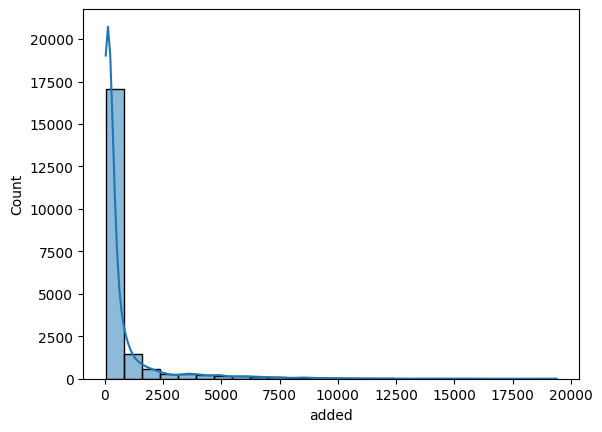

In [ ]:
sns.histplot(data=df2['added'], bins=25,kde=True)

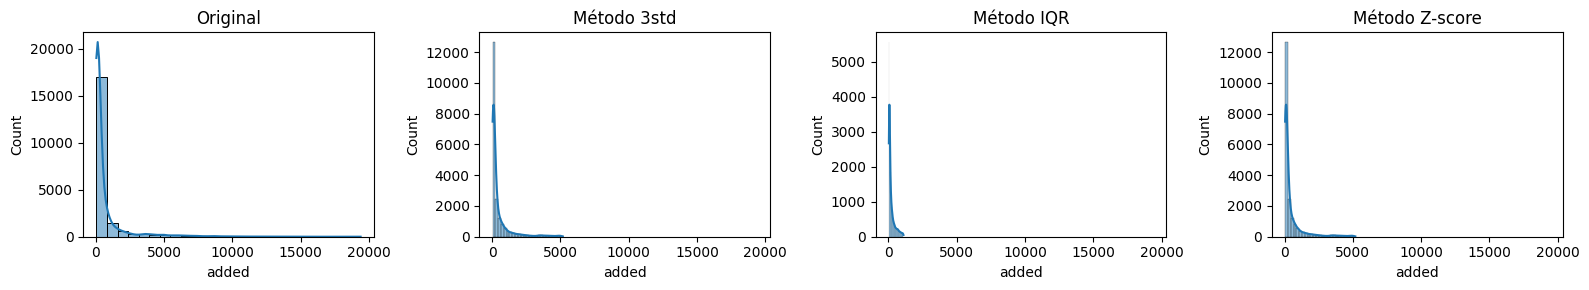

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df2['added'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(added_df1['added'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(added_df2['added'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(added_df4['added'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

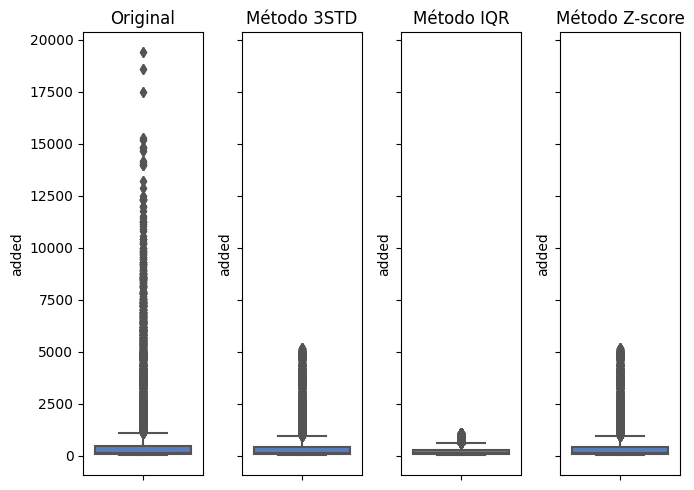

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df2,y='added',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=added_df1,y='added',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=added_df2,y='added',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=added_df4,y='added',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

### Coluna - playtime

In [ ]:
playtime_df1 = drop_outliers_3std(df2,'playtime')
playtime_df1v2 = drop_outliers_std_v2(df2,'playtime')
playtime_df2 = drop_outliers_iqr(df2,'playtime')
playtime_df4 = drop_outliers_z(df2,'playtime')

<Axes: xlabel='playtime', ylabel='Count'>

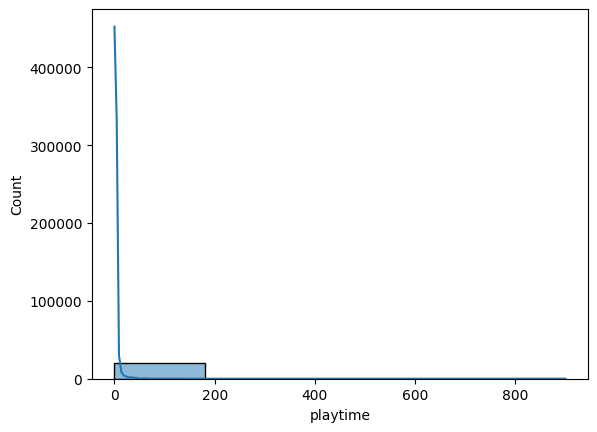

In [ ]:
sns.histplot(data=df2['playtime'], bins=5,kde=True)

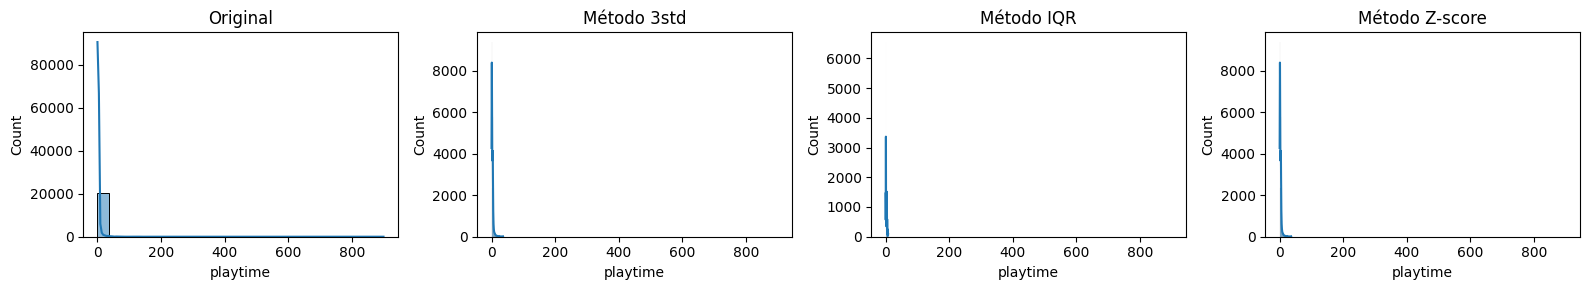

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df2['playtime'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(playtime_df1['playtime'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(playtime_df2['playtime'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(playtime_df4['playtime'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

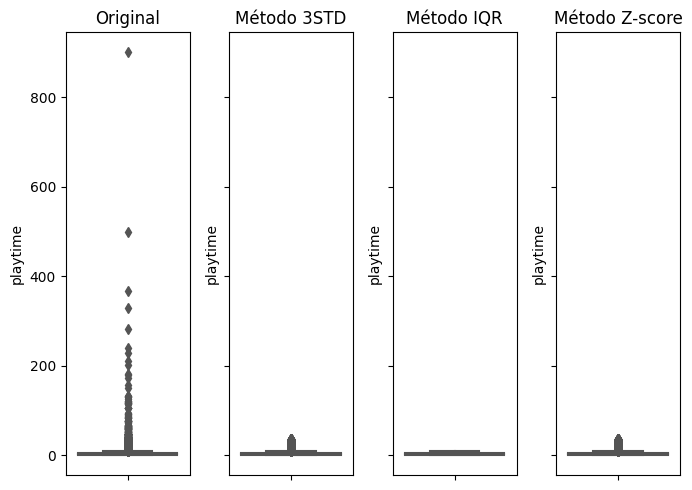

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df2,y='playtime',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=playtime_df1,y='playtime',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=playtime_df2,y='playtime',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=playtime_df4,y='playtime',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

### Coluna - reviews_count

In [ ]:
reviews_count_df1 = drop_outliers_3std(df2,'reviews_count')
reviews_count_df1v2 = drop_outliers_std_v2(df2,'reviews_count')
reviews_count_df2 = drop_outliers_iqr(df2,'reviews_count')
reviews_count_df4 = drop_outliers_z(df2,'reviews_count')

<Axes: xlabel='reviews_count', ylabel='Count'>

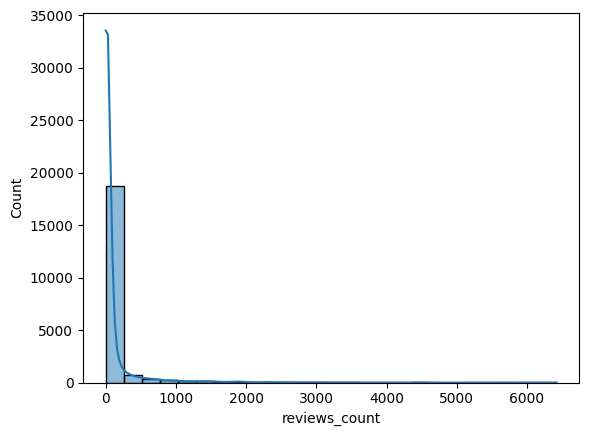

In [ ]:
sns.histplot(data=df['reviews_count'], bins=25,kde=True)

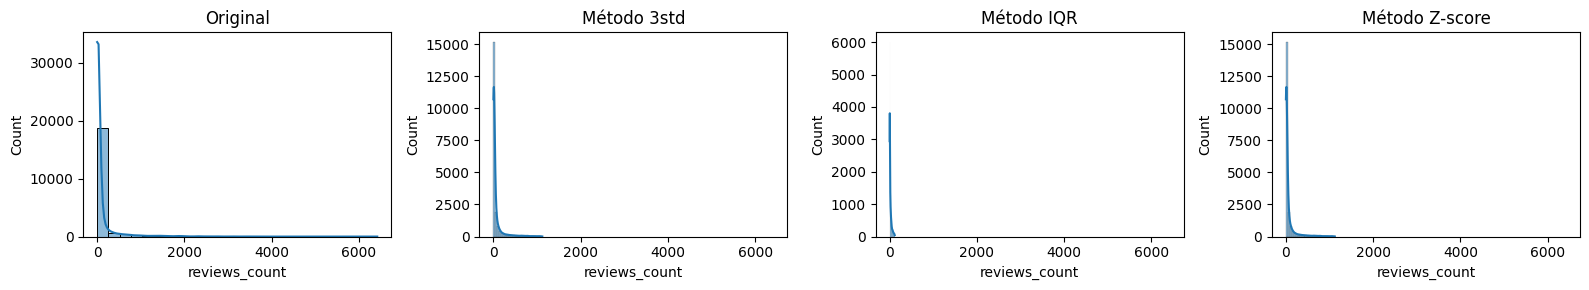

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df2['reviews_count'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(reviews_count_df1['reviews_count'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(reviews_count_df2['reviews_count'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(reviews_count_df4['reviews_count'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

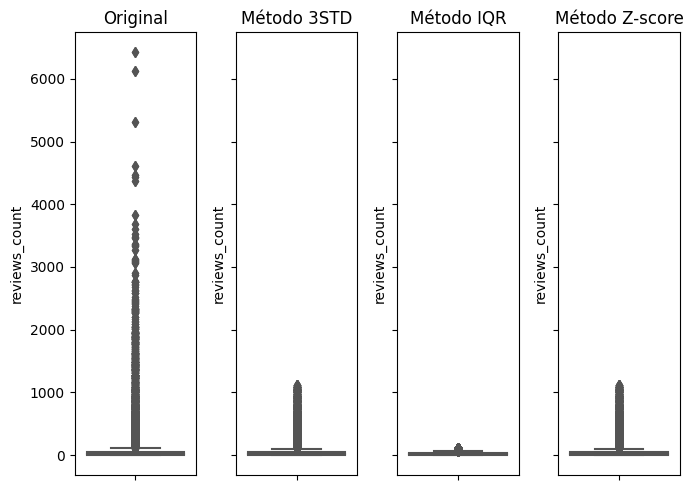

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df2,y='reviews_count',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=reviews_count_df1,y='reviews_count',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=reviews_count_df2,y='reviews_count',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=reviews_count_df4,y='reviews_count',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

### Coluna - ratings_count

In [ ]:
ratings_count_df1 = drop_outliers_3std(df2,'ratings_count')
ratings_count_df1v2 = drop_outliers_std_v2(df2,'ratings_count')
ratings_count_df2 = drop_outliers_iqr(df2,'ratings_count')
ratings_count_df4 = drop_outliers_z(df2,'ratings_count')

<Axes: xlabel='ratings_count', ylabel='Count'>

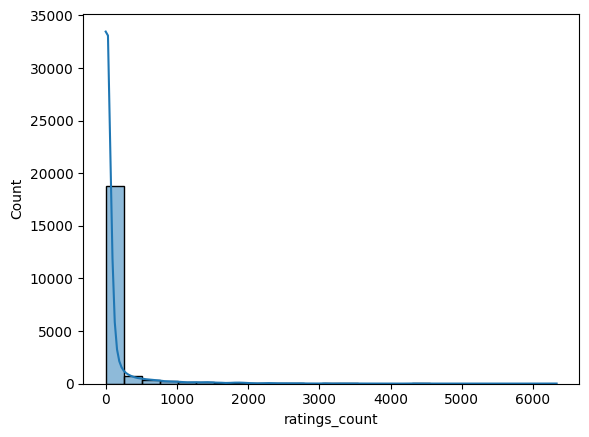

In [ ]:
sns.histplot(data=df['ratings_count'], bins=25,kde=True)

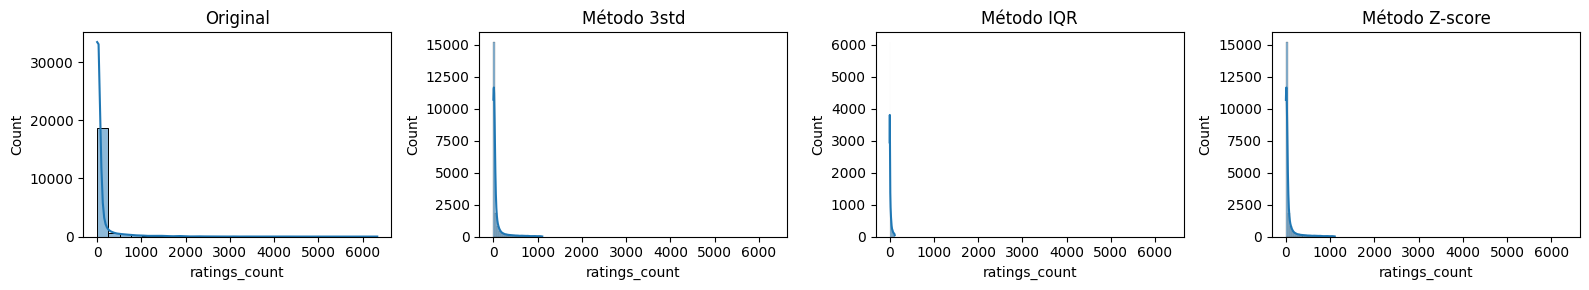

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df2['ratings_count'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(ratings_count_df1['ratings_count'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(ratings_count_df2['ratings_count'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(ratings_count_df4['ratings_count'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

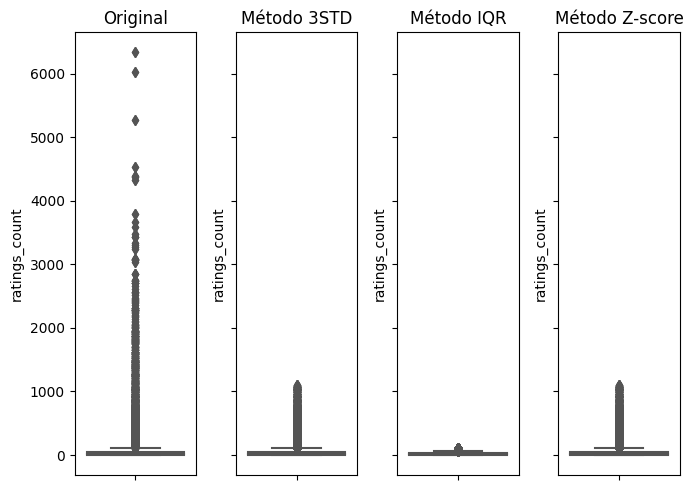

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df2,y='ratings_count',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=ratings_count_df1,y='ratings_count',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=ratings_count_df2,y='ratings_count',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=ratings_count_df4,y='ratings_count',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

### Coluna - rating

In [ ]:
rating_df1 = drop_outliers_3std(df2,'rating')
rating_df1v2 = drop_outliers_std_v2(df2,'rating')
rating_df2 = drop_outliers_iqr(df2,'rating')
rating_df4 = drop_outliers_z(df2,'rating')

<Axes: xlabel='rating', ylabel='Count'>

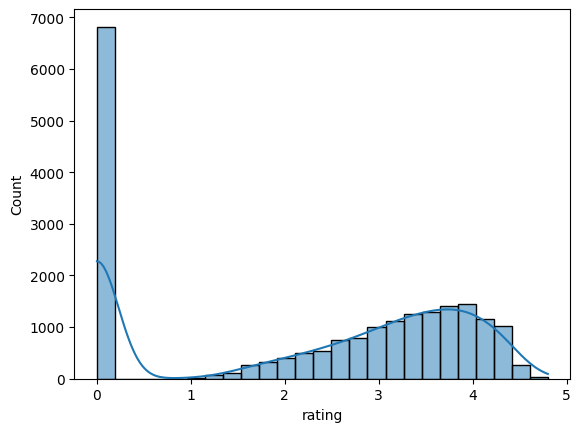

In [ ]:
sns.histplot(data=df2['rating'], bins=25,kde=True)

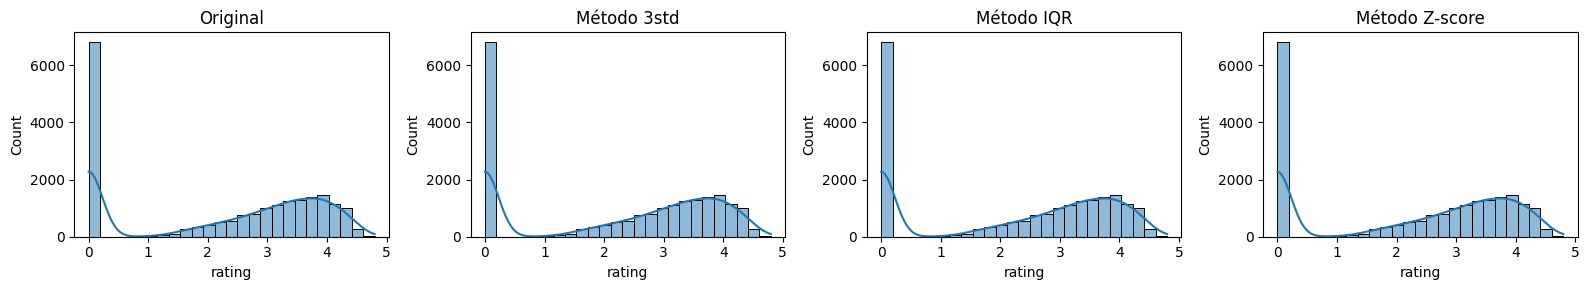

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df2['rating'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(rating_df1['rating'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(rating_df2['rating'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(rating_df4['rating'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

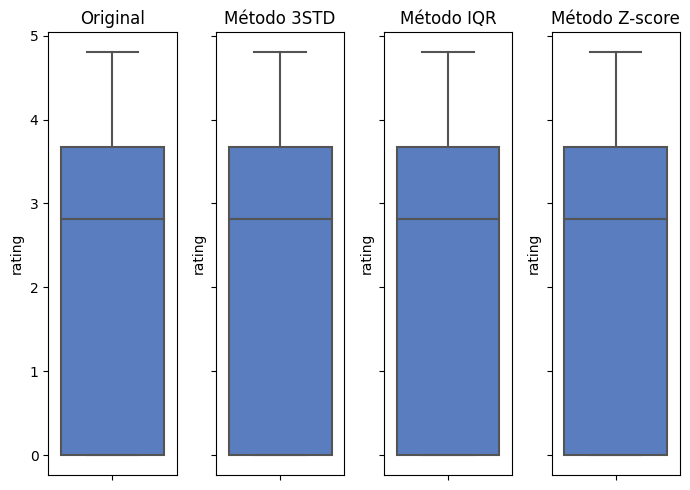

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df,y='rating',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=rating_df1,y='rating',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=rating_df2,y='rating',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=rating_df4,y='rating',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

## Transformação de dados/ tidy data

Text(0.5, 1.0, 'Original')

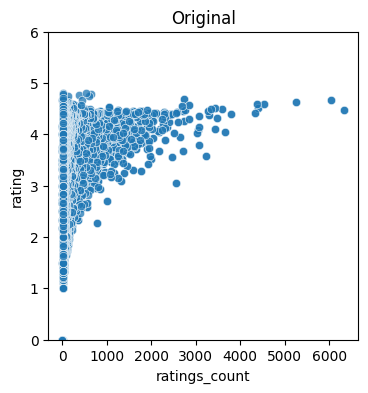

In [ ]:
plt.subplots(figsize=(4,4))
sns.scatterplot(data=df2,x='ratings_count',y='rating',alpha=0.75)
plt.ylim(0,6)
plt.title("Original")

Normalização - intervalo (0,1)

In [ ]:
def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

In [ ]:
def min_max_scaling_df_columns(df, cols):
    for col in cols:
      df[col+"_scal"] = min_max_scaling(df[col])
    return df

In [ ]:
ratings_count_df10 = ratings_count_df1.copy()
rating_df10 = drop_outliers_3std(ratings_count_df10,'rating')
df_scal1 = min_max_scaling_df_columns(df.copy(),['ratings_count','rating'])

Text(0.5, 1.0, 'MinMax')

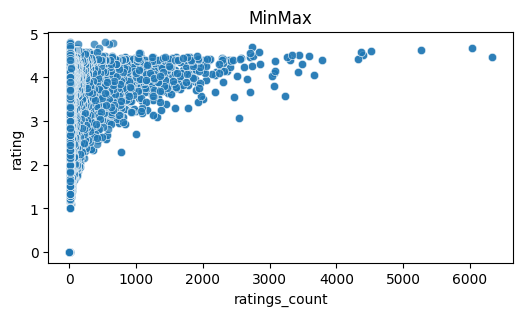

In [ ]:
plt.subplots(figsize=(6,3))
sns.scatterplot(data=df_scal1,x='ratings_count',y='rating',alpha=0.75)
plt.title("MinMax")

Drop da coluna id(não vejo necessidade desta coluna)

In [ ]:
df2 = df2.drop('id', axis=1)

Colocar novas colunas dividindo o released em ano, mês e dia

In [ ]:
df3= df2.copy()

In [ ]:
df3['year'] = df['released'].str.split('-').str[0]
df3['month'] = df['released'].str.split('-').str[1]
df3['day'] = df['released'].str.split('-').str[2]

In [ ]:
df3.sample(10)

,name,released,added,playtime,reviews_count,ratings_count,rating,year,month,day
19036,Defense the Farm,2018-06-05,54,1,4,4,0.00,2018,06,05
18439,Wordle 3,2020-10-06,58,4,1,1,0.00,2020,10,06
16406,Hack RUN,2011-04-07,76,3,4,4,0.00,2011,04,07
4142,Blood,1997-03-07,679,1,151,151,4.26,1997,03,07
10702,aMAZE 2,2017-04-21,151,4,6,5,2.33,2017,04,21
1802,Relic Hunters Zero,2015-08-18,1888,2,141,141,2.99,2015,08,18
4416,Bone: Out From Boneville,2008-06-17,626,1,21,21,2.10,2008,06,17
19831,Prehistoric Kingdom,2022-04-28,49,1,2,2,0.00,2022,04,28
847,A Story About My Uncle,2014-05-27,5475,3,613,606,3.16,2014,05,27
8186,InFlux,2013-07-22,237,2,6,6,2.83,2013,07,22


Imputação dos dados ausente (alternativa)

In [ ]:
df3.fillna('No Date Info',inplace=True)
df3[['year', 'month','day']]

,year,month,day
0,2013,09,17
1,2015,05,18
2,2011,04,18
3,2013,03,05
4,2012,08,21
...,...,...,...
20575,2017,02,02
20576,2017,04,14
20577,2015,01,30
20578,2016,09,15


remoção das linhas NaN da coluna released e transformação para as colunas year, month e day (alternativa não tão interessante pois há perda de info)

In [ ]:
df4 = df.copy()

In [ ]:
df4 = df4.drop('id', axis=1)

In [ ]:
df4.dropna(subset=['released'],how='any',inplace=True)
df4['released'].isnull().sum()

0

In [ ]:
df4.sample(10)

,name,released,added,playtime,reviews_count,ratings_count,rating
9535,Castlevania: Dawn of Sorrow,2005-10-04,183,3,74,73,4.39
20159,Singularity Roller,2017-08-08,47,1,2,2,0.00
7394,MINDNIGHT,2017-08-04,279,2,21,21,3.10
7252,Faery - Legends of Avalon,2010-11-10,289,4,22,21,3.00
5347,Super Mario 3D World,2013-11-21,467,58,222,218,4.36
4133,Boneworks,2019-12-10,680,3,83,81,4.17
3295,Soul Gambler,2013-08-01,895,3,62,62,2.94
13962,Tales,2016-11-14,98,4,3,2,0.00
3595,Age of Wonders,1999-11-11,804,1,63,63,3.24
7011,Aberoth,2015-07-17,304,1,14,14,2.57


In [ ]:
df4['year'] = df4['released'].str.split('-').str[0]
df4['month'] = df4['released'].str.split('-').str[1]
df4['day'] = df4['released'].str.split('-').str[2]

In [ ]:
df4 = df4.drop('released', axis=1)

In [ ]:
df4.sample(10)

,name,added,playtime,reviews_count,ratings_count,rating,year,month,day
7350,Pharaoh's Tomb,282,1,8,8,1.75,1990,12,14
14383,A Shawn Story,93,2,3,3,0.00,2017,10,11
19107,Koihime Enbu,54,4,2,2,0.00,2016,05,19
5692,Dark Devotion,424,3,43,41,3.19,2019,04,25
858,Surviving Mars,5382,4,426,425,3.49,2018,03,14
13664,Doodle God: Mighty Trio,101,1,1,1,0.00,2018,05,04
14663,Project Warlock II,90,2,6,6,3.50,2021,08,31
13686,The Settlers 7: Paths to a Kingdom,101,5,29,29,3.83,2010,03,23
8136,Lords of Xulima,240,8,17,16,3.35,2014,08,08
2967,Where the Water Tastes Like Wine,1017,2,52,49,3.42,2018,02,28


Dados categóricos

In [ ]:
df4['month'] = df4['month'].astype(int)

<Axes: >

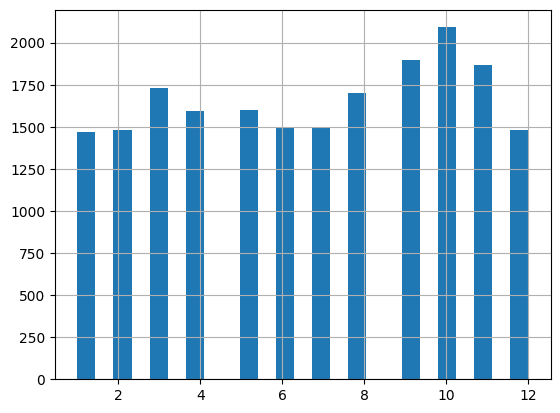

In [ ]:
df4['month'].sort_values().hist(bins=25)

In [ ]:
df4['day'] = df4['day'].astype(int)

<Axes: >

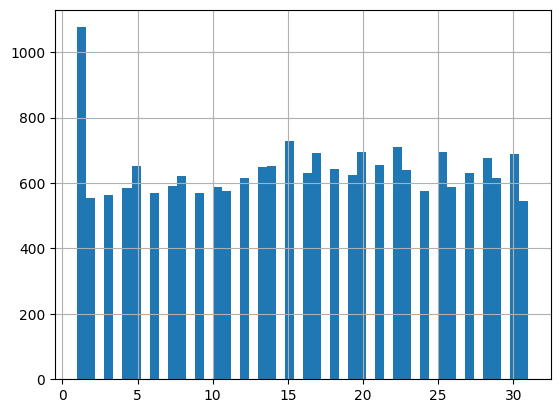

In [ ]:
df4['day'].sort_values().hist(bins=50)

In [ ]:
df4['year'] = df4['year'].astype(int)

Dados das colunas year, month e day que mais se repetem

In [ ]:
rep_year = df4['year'].value_counts()
rep_year

2016    2798
2017    2590
2015    2152
2018    1673
2014    1442
2020     908
2019     850
2013     799
2021     783
2012     641
2010     542
2022     537
2011     502
2009     482
2008     379
2007     282
2006     259
2005     216
2004     206
2003     189
1999     168
2001     167
2002     146
2000     135
1998     117
1997     117
1996     109
1993     104
2023     101
1995      87
1994      85
1991      66
1992      59
1990      37
1989      36
1987      25
1988      20
1986      16
1985      16
1984      14
1983       9
1982       8
1981       7
1979       4
1980       3
2024       3
2025       1
1978       1
1972       1
1971       1
1976       1
Name: year, dtype: int64

In [ ]:
rep_month = df4['month'].value_counts()
rep_month

10    2091
9     1897
11    1866
3     1731
8     1700
5     1597
4     1592
6     1496
7     1495
2     1482
12    1481
1     1466
Name: month, dtype: int64

In [ ]:
rep_day = df4['day'].value_counts()
rep_day

1     1076
15     729
22     710
25     695
20     695
17     692
30     690
28     677
21     654
14     653
5      653
13     648
18     643
23     639
16     631
27     630
19     623
8      620
12     615
29     615
7      590
26     589
10     588
4      586
24     577
11     575
9      569
6      569
3      564
2      554
31     545
Name: day, dtype: int64

## Parecer



---


É um conjunto de dados que consiste principalmente em colunas numéricas (int64 e float64) juntamente com algumas colunas de objeto (string). O uso de memória do conjunto de dados é de aproximadamente 1,3+ MB.

---




**-Sobre a detecção de valores ausentes:**

foram encontrados valores ausentes apenas na coluna released que se baseava na data de lançamento do videogame (tipo de dados: objeto). Houve uma imputação para trata-los em que informa-se que não há data informada(No Date Info)


---


**-Sobre o tratamento de dados Anômalos foi aplicada:**

-Regra empirica 3*std

-Tratamento com IQR

-Tratamento com Z-score

nas seguintes colunas: added, playtime, reviews_count, ratings_count e rating.


---


***-Sobre as transformações/ tidy data: ***

Fiz um drop na coluna id, que ao meu ver não me seria útil


Realizei a separação da coluna released que estava dividida em yyyy-MM-dd para novas colunas year, month e day. Porém enfrentei um desafio pois essa coluna possuía dados ausentes. Duas alternativas poderiam ser feitas: realizar imputação para as novas colunas year, month e day, ou realizar o drop das linhas de released antes da separação da coluna. A segunda opção foi a escolhida apesar de talvez não ser a melhor pois a porcentagem dos dados perdidos era considerável (686 valores, 3.3 percentagem).

Pensando em ter uma análise diferenciada e obter a quantidade de repetição de dados das novas colunas, permaneci na iniciativa da segunda opção. Porém permaneci preservando o dataset original (df)

---




# Parte II(Segundo Trabalho)

Utilizando Método de tratamento de anomalias Z-core

In [ ]:
dfp2=df4.copy()

In [ ]:
dfp2_zcore= drop_outliers_z(dfp2,'added')
dfp2_zcore = drop_outliers_z(dfp2_zcore,'playtime')
dfp2_zcore = drop_outliers_z(dfp2_zcore,'reviews_count')
dfp2_zcore = drop_outliers_z(dfp2_zcore,'ratings_count')
dfp2_zcore = drop_outliers_z(dfp2_zcore,'rating')

**Análise Univariada**

Descrição dos atributos numéricos

In [ ]:
dfp2_zcore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 349 to 20579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           18047 non-null  object 
 1   added          18047 non-null  int64  
 2   playtime       18047 non-null  int64  
 3   reviews_count  18047 non-null  int64  
 4   ratings_count  18047 non-null  int64  
 5   rating         18047 non-null  float64
 6   year           18047 non-null  int64  
 7   month          18047 non-null  int64  
 8   day            18047 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.4+ MB


In [ ]:
dfp2_zcore.skew(numeric_only=True).sort_values(ascending=False)[:5]

playtime         5.081278
added            3.121668
ratings_count    2.612938
reviews_count    2.609616
day             -0.030843
dtype: float64

In [ ]:
dfp2_zcore.skew(numeric_only=True).sort_values(ascending=False)[:-6:-1]

year            -1.878940
rating          -0.259263
month           -0.086921
day             -0.030843
reviews_count    2.609616
dtype: float64

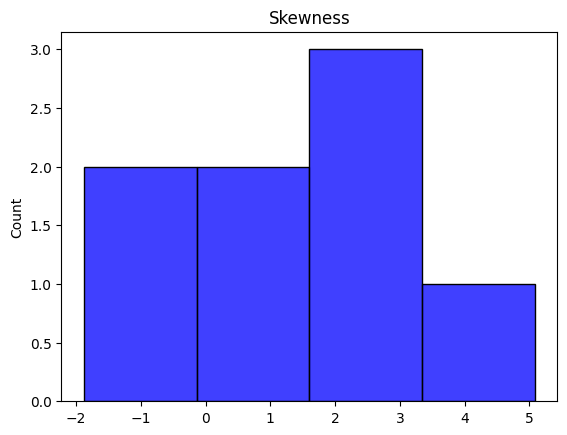

In [ ]:
sns.histplot(dfp2_zcore.skew(numeric_only=True),color='blue')
plt.title("Skewness")
plt.show()

In [ ]:
dfp2_zcore.kurt(numeric_only=True).sort_values(ascending=False)[:10]

playtime         39.590201
added            13.336551
ratings_count     7.219495
reviews_count     7.204241
year              4.023051
day              -1.187113
month            -1.232292
rating           -1.584259
dtype: float64

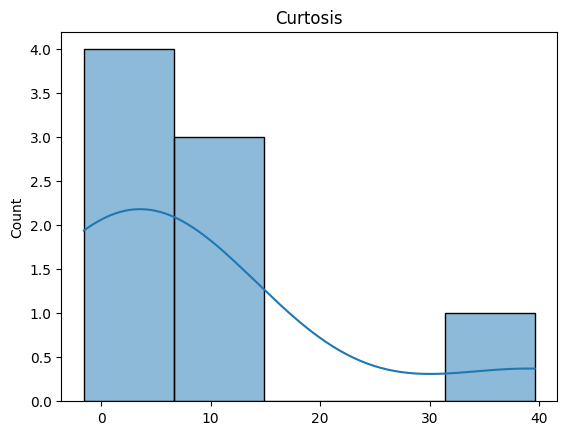

In [ ]:
sns.histplot(dfp2_zcore.kurt(numeric_only=True), kde = True)
plt.title("Curtosis")
plt.show()

Text(5000, 135.0, 'kurt = 4.02')

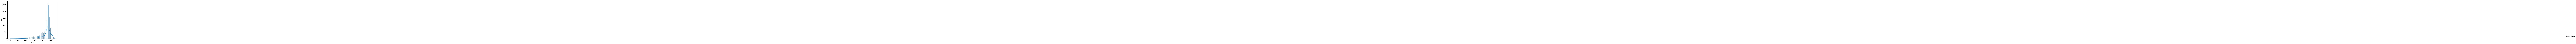

In [ ]:
skw = dfp2_zcore['year'].skew()
krt = dfp2_zcore['year'].kurt()
sns.histplot(dfp2_zcore['year'], kde=True);
plt.text(5000,150.0,f"skew = {skw:0.2f}")
plt.text(5000,135.0,f"kurt = {krt:0.2f}")

<Axes: >

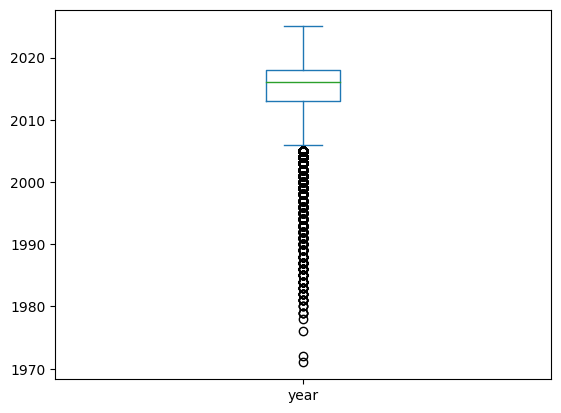

In [ ]:
dfp2_zcore['year'].plot.box()

In [ ]:
logYear = np.log(dfp2_zcore['year'])
logYear.skew()

-1.8913714424560606

<Axes: xlabel='year', ylabel='Count'>

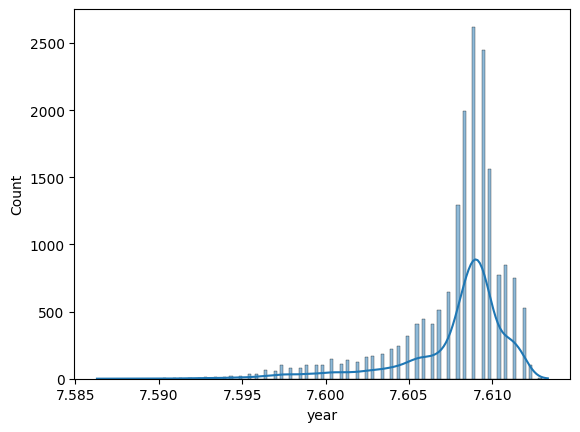

In [ ]:
sns.histplot(logYear,kde=True)

<Axes: >

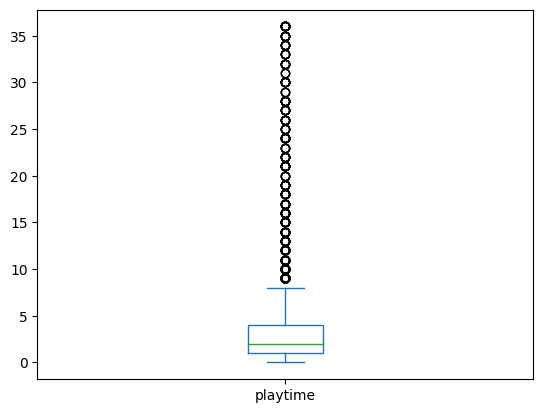

In [ ]:
dfp2_zcore['playtime'].plot.box()

In [ ]:
nf_cols = dfp2_zcore.columns
nf_cols

Index(['name', 'added', 'playtime', 'reviews_count', 'ratings_count', 'rating',
       'year', 'month', 'day'],
      dtype='object')

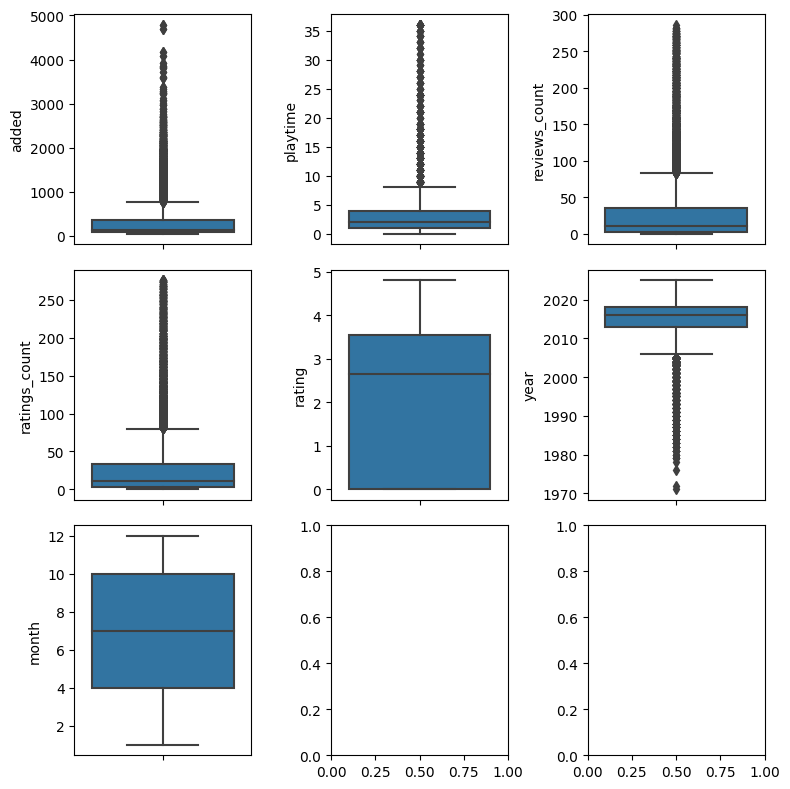

In [ ]:
fig,axes=plt.subplots(nrows=3,
                      ncols=3,
                      figsize=(8,8))
axes = axes.flatten() # ou .ravel()
for i,col in enumerate(nf_cols[1:-1]):
    if (i<len(axes)):
        sns.boxplot(data=dfp2_zcore,y=col,ax=axes[i])
plt.tight_layout()

**Análise Bivariada**

Encontrar padrões a partir do nível de correlação entre os atributos. Por exemplo, vamos fazer a correlação de todos os atriutos em relação a year

In [ ]:
correlation = dfp2_zcore.drop(['name'],axis='columns').corr()
print(correlation['rating'].sort_values(ascending = False)[:10])

rating           1.000000
reviews_count    0.498581
ratings_count    0.497134
added            0.325685
month            0.054027
playtime         0.027879
day              0.012223
year            -0.306226
Name: rating, dtype: float64


In [ ]:
correlation = dfp2_zcore.drop(['name'],axis='columns').corr()
print(correlation['ratings_count'].sort_values(ascending = False)[:10])

ratings_count    1.000000
reviews_count    0.999845
added            0.764134
rating           0.497134
playtime         0.094617
month            0.031624
day              0.019308
year            -0.206374
Name: ratings_count, dtype: float64


In [ ]:
correlation = dfp2_zcore.drop(['name'],axis='columns').corr()
print(correlation['added'].sort_values(ascending = False)[:10])

added            1.000000
ratings_count    0.764134
reviews_count    0.762421
rating           0.325685
playtime         0.060980
day              0.023093
month            0.007456
year            -0.043087
Name: added, dtype: float64


Para continuar a análise iremos utilizar os seguintes tipos de visualizações:

*   Heat Map das correlações
*   Heat Map com as correlações mais importantes
*   Pair Plot
*   Scatter Plot

Heat Map das Correlações

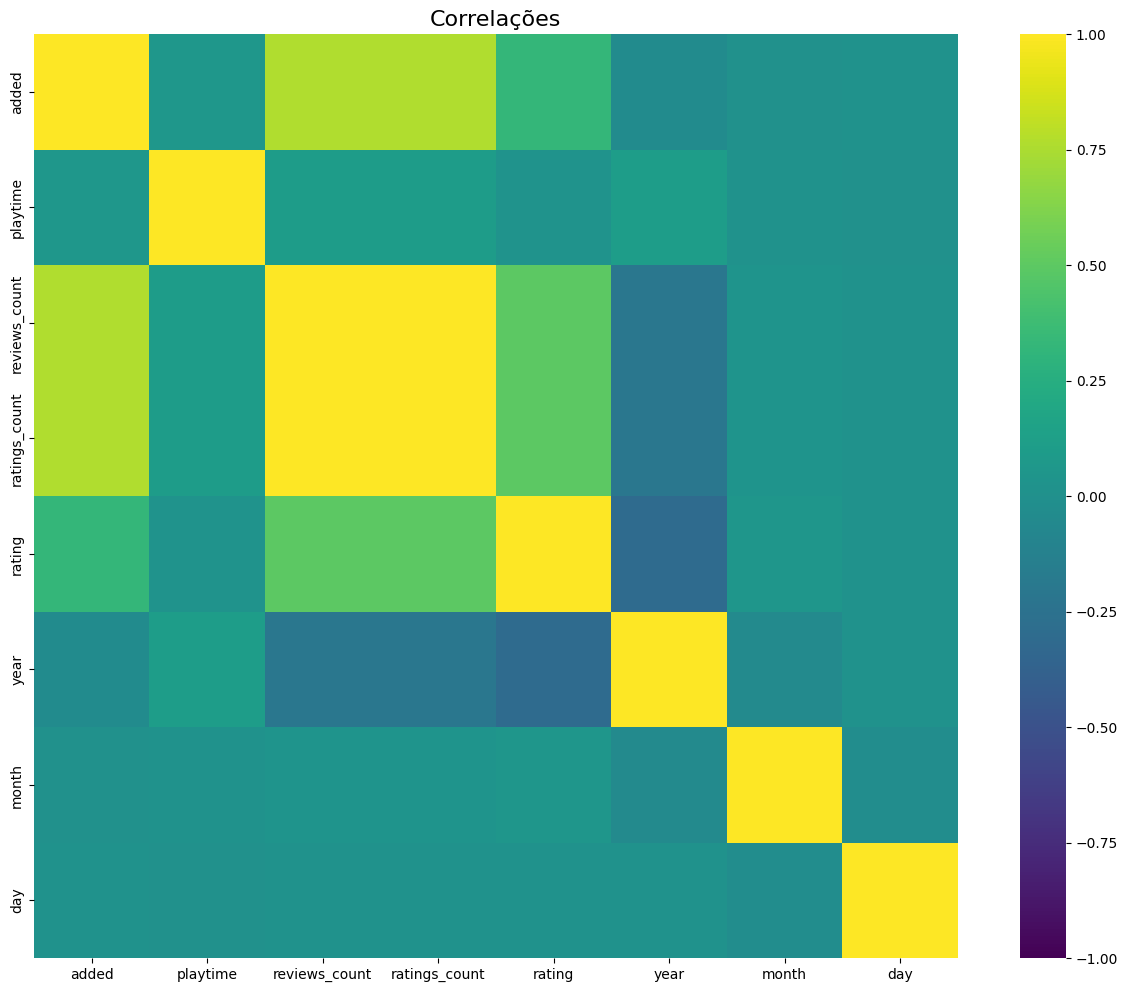

In [ ]:
f , ax = plt.subplots(figsize = (16,12))
plt.title('Correlações',y=1,size=16)
sns.heatmap(correlation,
            square = True,
            vmin=-1.0,
            vmax=1.0,
            cmap='viridis')
plt.show()

Zoomed HeatMap

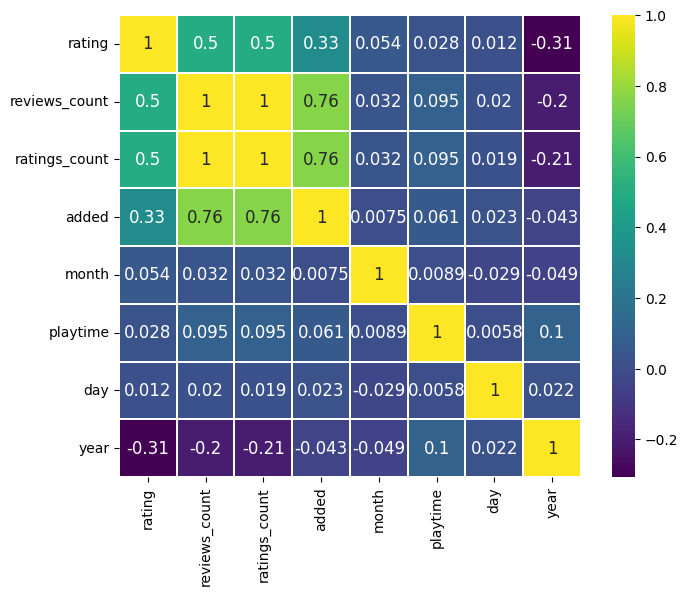

In [ ]:
k= 10
cols = correlation.nlargest(k,'rating')['rating'].index
corr = np.corrcoef(dfp2_zcore[cols].values.T)
f , ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='viridis',
            linecolor="white",
            xticklabels = cols.values ,
            annot_kws = {'size':12},
            yticklabels = cols.values,
           )
plt.show()

Pair Plot

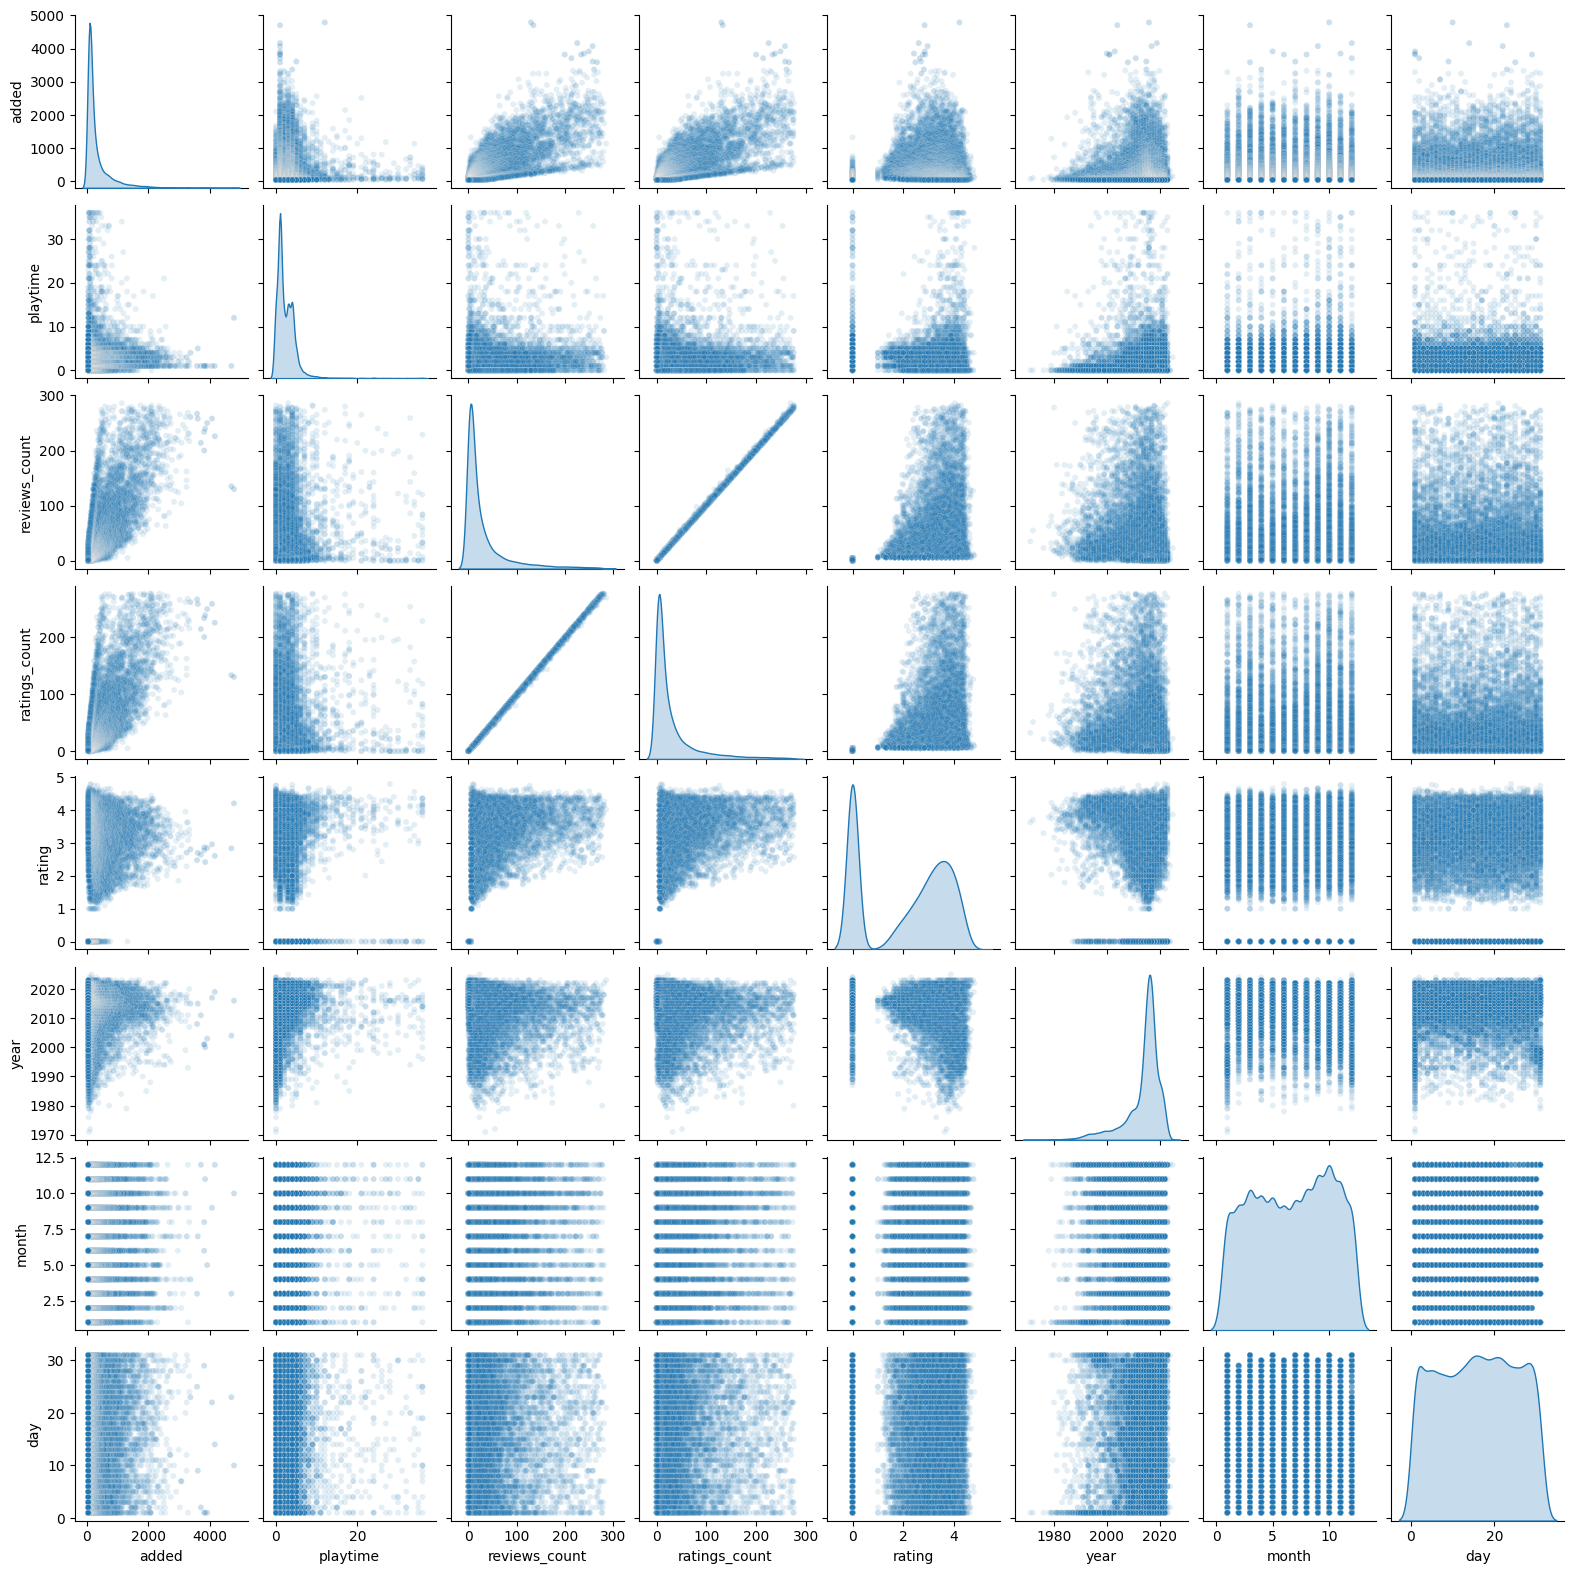

In [ ]:
columns = ['added','playtime','reviews_count','ratings_count','rating','year','month','day']
sns.pairplot(dfp2_zcore[columns],height = 2 ,kind ='scatter',diag_kind='kde',plot_kws=dict(alpha=0.12,size=1))
plt.show()

Scatter Plot

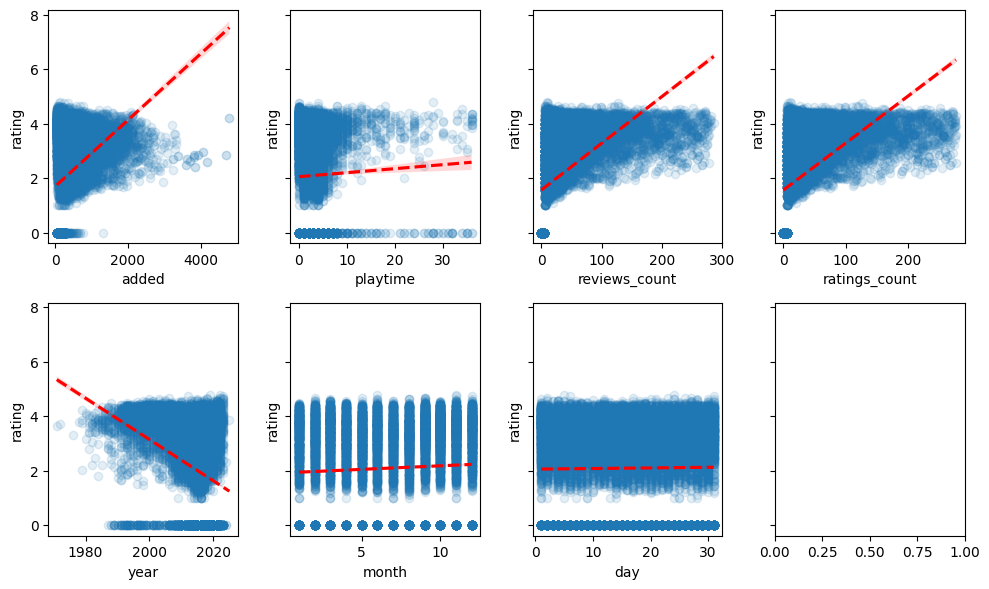

In [ ]:
cols = ['added','playtime','reviews_count','ratings_count','year','month','day']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,6),sharey=True)
axes= axes.flatten()
for i,col in enumerate(cols):
    sns.regplot(y='rating',x=col,data = dfp2_zcore[['rating',col]],fit_reg=True, ax=axes[i],scatter_kws=dict(alpha=0.12),line_kws=dict(color='red',linestyle='--'))

plt.tight_layout()

Text(0, 0.5, 'Mean rating')

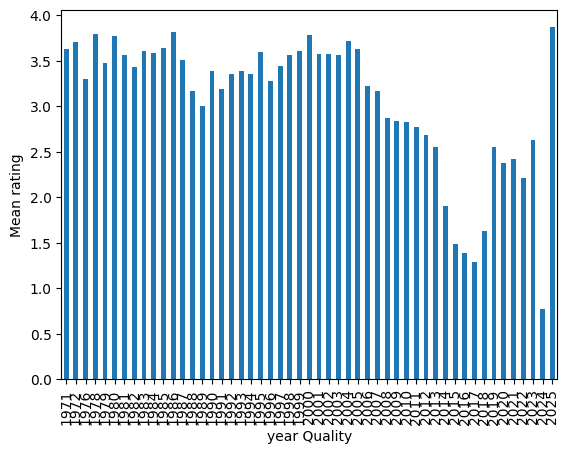

In [ ]:
dfp2_zcore.groupby(by='year')['rating'].mean().plot(kind='bar')
plt.xlabel('year Quality')
plt.ylabel('Mean rating')

Text(0, 0.5, 'Mean playtime')

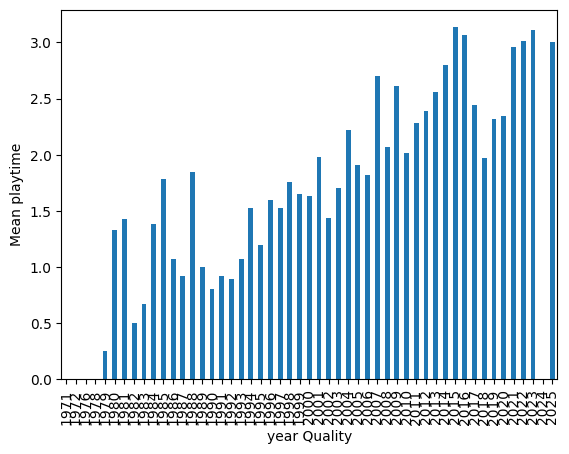

In [ ]:
dfp2_zcore.groupby(by='year')['playtime'].mean().plot(kind='bar')
plt.xlabel('year Quality')
plt.ylabel('Mean playtime')

Text(0, 0.5, 'Mean added')

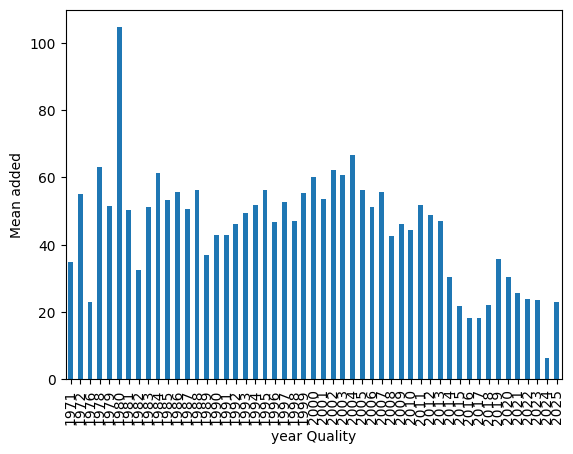

In [ ]:
dfp2_zcore.groupby(by='year')['reviews_count'].mean().plot(kind='bar')
plt.xlabel('year Quality')
plt.ylabel('Mean added')

month vs rating

<Axes: xlabel='month', ylabel='rating'>

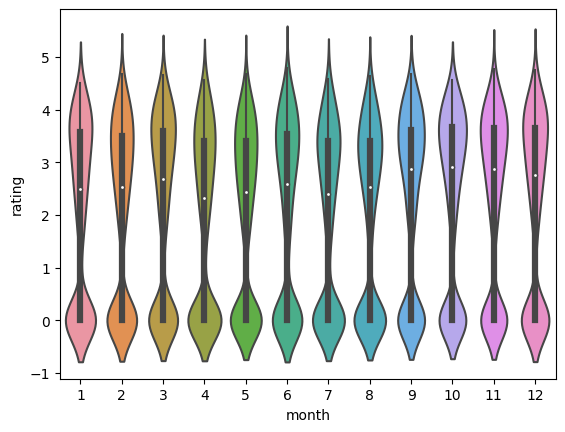

In [ ]:
sns.violinplot(data = dfp2_zcore,x='month', y='rating')

### Parecer II

A análise exploratória de dados é uma etapa crucial na análise de dados, onde diferentes técnicas e métodos são aplicados para entender, resumir e visualizar os dados. Existem três tipos principais de análise exploratória de dados: análise univariada, análise bivariada e análise multivariada.

---

Análise Univariada:

---


*   Assimetria negativa em muitos valores: A cauda da distribuição estende-se para a esquerda, indicando uma inclinação em direção a valores menores em relação à média. Isso significa que há uma proporção maior de valores maiores em relação aos valores menores.


*   Na utilização da função .kurt para extrair as curtosis, foi observado que "playtime, added, ratings_count, reviews_count, year" possuem distribuição leptocúrtica. Isso significa que a distribuição tem caudas mais pesadas e um pico mais pronunciado em relação à distribuição normal. A leptocurtose indica que a distribuição possui mais valores extremos em relação à média. Já "day, month, rating" possuem distribuição chamada platicúrtica.  Isso significa que a distribuição tem caudas mais leves e um pico menos pronunciado em relação à distribuição normal. A platicurtose indica que a distribuição possui menos valores extremos em relação à média.


*   Foi gerado um boxplot para visualização dos valores numéricos



---

Análise bivariada:

---


*   Observa-se que a partir das correlações as colunas added, ratings_count e reviews_count possuem valores próximos a 1 o que significa que há possível correlação.


*   Pode-se observar a média de rating por year.


---



*   Observa-se que a partir da quantidade de valores na coluna year, pode-se observar uma queda no lançamento de jogos durante e pós pandemia, sendo o pico da quantidade de jogos lançados no ano de 2016.
*   Vale destacar que a média de horas jogadas(playtime) aumenta com o passar dos anos, ou seja, pode-se supor que com o passar dos anos os jogos tendem a ser mais demorados para serem finalizados("zerados").

